In [84]:
# importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [26]:
# reading csv file form system

df=pd.read_csv('placement.csv')

In [27]:
# displaying top data from csv file

df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [29]:
# checking the shape of dataset file (no of rows and columns)

df.shape

(200, 2)

In [33]:
# summary of dataset

df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [45]:
# information(meta data) of dataset

information_df=df.info()
information_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [42]:
# Checking for any missing records

missing_value=df.isna().sum()
missing=df.isna().sum().sum()
if missing==0:
    print(f'There is no missing values in dataset.\n{missing_value}')

There is no missing values in dataset.
cgpa       0
package    0
dtype: int64


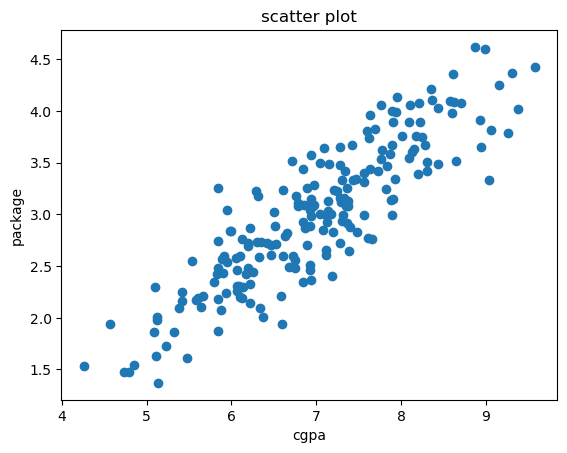

In [46]:
#checking whether our features has linear relationship or not

plt.scatter(df["cgpa"],df["package"])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.title('scatter plot')
plt.show()

In [95]:
# now, we are segregating our features columns to dependet and independent

x=df.iloc[:,:1] # independent feature
y=df.iloc[:,1] # dependent feature

In [96]:
x,y

(     cgpa
 0    6.89
 1    5.12
 2    7.82
 3    7.42
 4    6.94
 ..    ...
 195  6.93
 196  5.89
 197  7.21
 198  7.63
 199  6.22
 
 [200 rows x 1 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [97]:
# now, we will split the data into training and testing data

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.15, random_state=42)

In [98]:
# these are used to train the models

x_train, y_train

(     cgpa
 9    8.31
 18   6.94
 55   8.20
 75   6.97
 150  6.30
 ..    ...
 106  6.13
 14   7.73
 92   7.90
 179  7.14
 102  5.13
 
 [170 rows x 1 columns],
 9      3.51
 18     2.98
 55     3.39
 75     3.28
 150    2.73
        ... 
 106    2.19
 14     3.42
 92     4.00
 179    3.03
 102    1.37
 Name: package, Length: 170, dtype: float64)

In [99]:
x_train.shape, y_train.shape

((170, 1), (170,))

In [100]:
# These are used for model performance 
# The test set evaluates how well the model generalizes to unseen data.

x_test.head(), y_test.head()

(     cgpa
 95   6.63
 15   7.25
 30   7.36
 158  5.95
 128  7.93,
 95     2.79
 15     3.23
 30     3.26
 158    3.04
 128    3.34
 Name: package, dtype: float64)

In [101]:
x_test.shape, y_test.shape

((30, 1), (30,))

In [102]:
# Selecting the model that is: ""linearRegression"" model

model=LinearRegression()

In [103]:
# the "fit" function is used to train the model on the training dataset

model.fit(x_train, y_train)
# our model is fitted.

LinearRegression()

In [104]:
# the "score" function evaluates the model's performance based on the data passed to it

model_score=model.score(x_train, y_train)
print(model_score)
if model_score>0.5:
    print("Our Trained model is Perfect.")
elif model_score<0.5:
    print("Our Trained model is not Perfect.")
else:
    print("Model is not Trained.")

0.7741811633951949
Our Trained model is Perfect.


In [105]:
# the "predict" function is used to predicts the values point on unseen data points

y_predict=model.predict(x_test)
y_predict


array([2.78511178, 3.13682871, 3.1992301 , 2.39935773, 3.52258277,
       3.76084262, 3.16519298, 2.55252478, 3.17653869, 3.48854564,
       1.92283802, 2.35964775, 3.68142267, 2.76242037, 3.47152708,
       3.04606305, 2.33695634, 3.20490296, 2.18946214, 3.31268718,
       2.46175912, 2.90424171, 3.31836003, 2.87587744, 3.33537859,
       2.2064807 , 1.44064545, 2.71703754, 3.18221154, 2.33695634])

## Note: "y_test" is our actual value and "y_predict" is our prediction value

In [106]:
# the (r square)function tells us how well a regression model fits the data

r_score=r2_score(y_test, y_predict)
print(r_score)
if r_score>0.5:
    print("Our Regression model is best fitted on data.")
elif r_score<0.5:
    print("Our Regression model is not best fitted on data.")
else:
    print("Regression Model is not Trained.")

0.7804129897987836
Our Regression model is best fitted on data.


In [107]:
# finding the ROOT MEAN SQUARE ERROR 

rems_score=np.sqrt(mean_squared_error(y_test,y_predict))
rems_score

0.30434647724006536

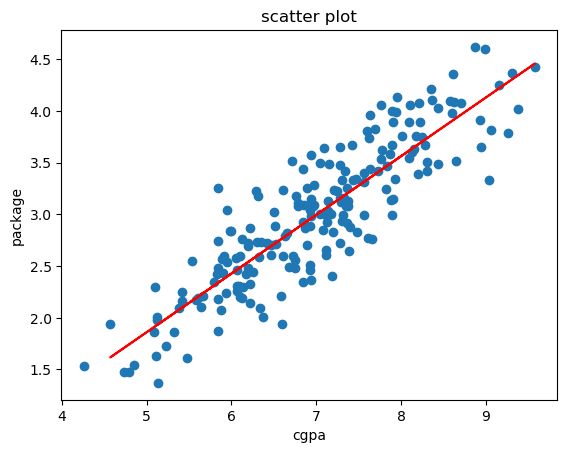

In [110]:
# Plotting the regression line on the actual data points and predicted points

plt.scatter(df.iloc[:,:1], df.iloc[:,1])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.title('scatter plot')
plt.plot(x_train, model.predict(x_train), color='red')